In [34]:
"""
Importing necessary Python libraries for data manipulation and visualization.
- pandas: for handling dataframes
- numpy: for numerical operations
- matplotlib & seaborn: for plotting graphs
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
"""
Reading the CSV dataset into a pandas DataFrame.
- The CSV is comma-separated, so the default pd.read_csv() works.
- Display first few rows to check the data.
"""
df_analysis = pd.read_csv('Mental Health dataset1.csv')
df_analysis.head()


,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions
0,Female,UK,Others,No,Yes,No,15-30 days,No,Yes,Yes,High,No,Yes,Maybe,No,No,No
1,Female,USA,Housewife,No,Yes,No,15-30 days,Maybe,Maybe,Yes,High,Maybe,Yes,Maybe,Maybe,No,Not sure
2,Female,Canada,Others,No,No,Yes,More than 2 months,Maybe,No,No,Medium,No,No,No,No,No,Not sure
3,Female,Canada,Corporate,No,Yes,Yes,Go out Every day,No,Maybe,No,Medium,No,No,Maybe,No,No,Not sure
4,Female,UK,Corporate,No,No,Yes,More than 2 months,Yes,No,Maybe,Medium,Maybe,No,Maybe,Maybe,No,Not sure


In [39]:
"""
Cleaning string/object columns:
- Remove leading/trailing spaces using .str.strip()
- Convert all strings to lowercase using .str.lower()
- This ensures consistent values for mapping later
"""
for col in df_analysis.columns:
    if df_analysis[col].dtype == 'object':
        df_analysis[col] = df_analysis[col].str.strip().str.lower()

In [41]:
"""
Defining mappings for categorical and ordinal columns.

- DaysIndoors: map ranges to numeric values
- MoodSwings, IncreasingStress, WorkInterest, etc.: ordinal mapping to numbers
- Binary yes/no/maybe/not sure columns: map to 1/0/0.5
- This step ensures all data used for statistics and plots is numeric
"""
days_map = {
    '1-14 days': 1,
    '15-30 days': 2,
    '31-60 days': 3,
    '61-90 days': 4,
    '90+ days': 5,
    'more than 2 months': 6,
    'go out every day': 0
}

ordinal_map = {'no':0, 'maybe':1, 'medium':2, 'high':3, 'yes':1}

binary_map = {'yes':1, 'no':0, 'maybe':0.5, 'not sure':0.5}


In [42]:
"""
Applying the mappings to appropriate columns
- DaysIndoors -> map using days_map
- Ordinal columns -> map using ordinal_map
- Binary columns -> map using binary_map
"""
df_analysis['DaysIndoors'] = df_analysis['DaysIndoors'].map(days_map)

ordinal_cols = ['MoodSwings','IncreasingStress','WorkInterest','MentalHealthHistory','SocialWeakness']
for col in ordinal_cols:
    df_analysis[col] = df_analysis[col].map(ordinal_map)

binary_cols = ['SelfEmployed','FamilyHistory','Treatment','HabitsChange','CopingStruggles','MentalHealthInterview','CareOptions']
for col in binary_cols:
    df_analysis[col] = df_analysis[col].map(binary_map)


In [43]:
"""
Filling any remaining NaNs(if any) in numeric columns with 0
- Ensures statistical computations do not fail
- Numeric columns: DaysIndoors, MoodSwings, IncreasingStress, WorkInterest
"""
numeric_cols = ['DaysIndoors','MoodSwings','IncreasingStress','WorkInterest']
df_analysis[numeric_cols] = df_analysis[numeric_cols].fillna(0)


In [44]:
"""
Computing the 4 main statistical moments for numeric columns
- Mean: average value
- Variance: measure of spread
- Skewness: asymmetry of distribution
- Kurtosis: heaviness of tails
"""
stats_moments = pd.DataFrame({
    'Mean': df_analysis[numeric_cols].mean(),
    'Variance': df_analysis[numeric_cols].var(),
    'Skewness': df_analysis[numeric_cols].skew(),
    'Kurtosis': df_analysis[numeric_cols].kurtosis()
})
print("Statistical Moments:\n", stats_moments)


Statistical Moments:
                       Mean  Variance  Skewness  Kurtosis
DaysIndoors       2.342872  4.131207  0.733487 -0.625977
MoodSwings        1.630862  1.542446 -0.343784 -1.519478
IncreasingStress  0.685422  0.215619 -0.798640 -1.362185
WorkInterest      0.638539  0.230808 -0.576738 -1.667386


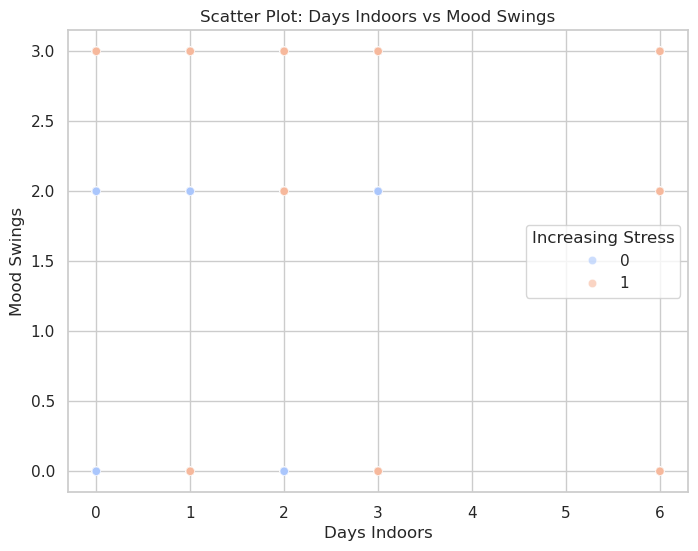

In [45]:
"""
Creating a scatter plot
- X-axis: DaysIndoors
- Y-axis: MoodSwings
- Hue: IncreasingStress
- Alpha: transparency for overlapping points
- This shows relationship between time spent indoors, mood swings, and stress
"""
plt.figure(figsize=(8,6))
sns.scatterplot(x='DaysIndoors', y='MoodSwings', data=df_analysis,
                hue='IncreasingStress', alpha=0.6, palette='coolwarm')
plt.title("Scatter Plot: Days Indoors vs Mood Swings")
plt.xlabel("Days Indoors")
plt.ylabel("Mood Swings")
plt.legend(title="Increasing Stress")
plt.show()


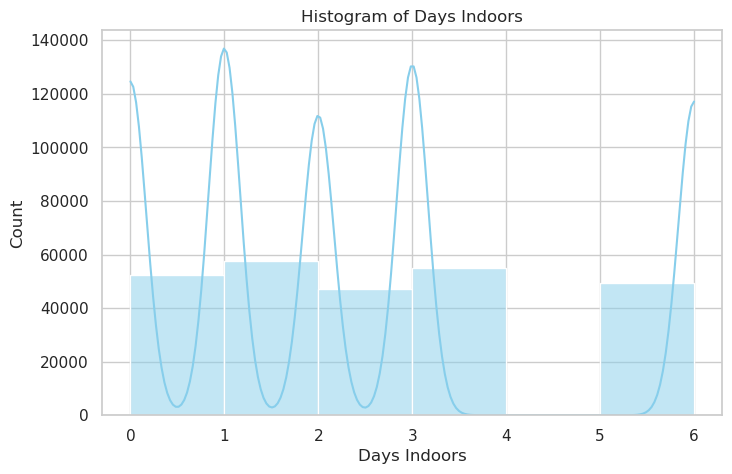

In [46]:
"""
Creating a histogram for DaysIndoors
- Shows distribution of how many days individuals spend indoors
- KDE adds a smooth density curve
"""
plt.figure(figsize=(8,5))
sns.histplot(df_analysis['DaysIndoors'], bins=6, kde=True, color='skyblue')
plt.title("Histogram of Days Indoors")
plt.xlabel("Days Indoors")
plt.ylabel("Count")
plt.show()


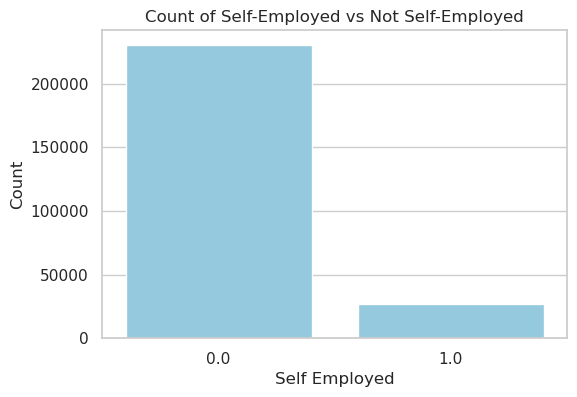

In [47]:
"""
Creating a bar plot for SelfEmployed
- Counts number of self-employed vs not self-employed
- Use color instead of palette to avoid FutureWarning
"""
plt.figure(figsize=(6,4))
sns.countplot(x='SelfEmployed', data=df_analysis, color='skyblue')
plt.title("Count of Self-Employed vs Not Self-Employed")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.show()


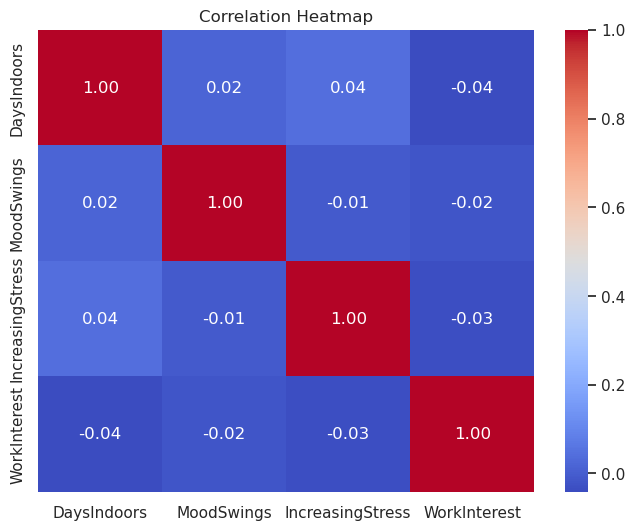

In [48]:
"""
Computing and plotting correlation heatmap for numeric columns
- Shows relationships between DaysIndoors, MoodSwings, IncreasingStress, WorkInterest
- Annot=True shows the correlation values on the heatmap
"""
corr_matrix = df_analysis[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()
